In [1]:
import pandas as pd
import matplotlib.pyplot as plt                   # 시각화 도구
plt.rcParams['font.size'] = 15                    # matplotlib의 글꼴 크기
plt.rcParams['font.family'] = 'NanumGothicCoding' # matplotlib의 글꼴
from wordcloud import WordCloud
from tqdm.notebook import trange, tqdm

In [2]:
df_comedy = pd.read_csv('./comedy_token.csv', encoding='cp949')
df_fantasy = pd.read_csv('./fantasy_token.csv', encoding='cp949')
df_2010_15 = pd.read_csv('./2010_15_token.csv', encoding='cp949')

In [3]:
df_comedy

,댓글번호,작성일자,댓글,평점,관람여부,스포여부,공감수,비공감수,id,영화제목,토큰단어
0,7166205,2013.01.24 14:58,그나마 이게 젤 재밋 엇음,9,0,0,51,13,engr****,가문의위기,"['그나마', '젤', '재밋', '엇음']"
1,8769120,2014.05.27 03:23,진짜 재밌었는데 평점 왜 이러지,10,0,0,44,13,빠샤(0718****),가문의위기,"['진짜', '재밌었는데', '평점', '왜', '이러지']"
2,7132359,2013.01.19 12:56,시리즈 중에 편이 그나마 나은 듯,8,0,0,33,14,해오름빛(ngh6****),가문의위기,"['시리즈', '중', '편이', '그나마', '나은']"
3,8766585,2014.05.26 07:08,년이 지나서 보게 되었는데 재밌네요 특히 탁 재훈의 재미를 배가 시켜주네요,8,0,0,25,12,삐딱500(leec****),가문의위기,"['년', '지나서', '보게', '되었는데', '재밌네요', '특히', '탁', ..."
4,14981233,2018.12.18 00:14,나 사는 지역에 멀티플렉스 처음 생겼을 때 봤던 영화,2,0,0,12,0,매니 파퀴아오(ldy2****),가문의위기,"['사는', '지역', '멀티플렉스', '처음', '생겼을', '때', '봤던']"
...,...,...,...,...,...,...,...,...,...,...,...
49995,14846625,2018.11.11 22:39,재밌고 유쾌한 장면을 보며 무거운 느낌을 동시에 받는 영화,10,1,0,1,1,류성준(jser****),완벽한타인,"['재밌고', '유쾌한', '장면', '보며', '무거운', '느낌', '동시', ..."
49996,14808852,2018.11.03 00:07,정말 올해 최고의 영화,10,0,0,3,4,yhy9****,완벽한타인,"['정말', '올해', '최고']"
49997,14915427,2018.11.29 03:14,때로는 비밀을 지켜나가는 게 더 행복할 수 있다는 걸 깊이 깨닫게 해주는 엄청난 영...,10,0,0,1,0,지원(knji****),완벽한타인,"['때로는', '비밀', '지켜', '나가는', '더', '행복할', '있다는', ..."
49998,14864914,2018.11.16 18:29,현실감 있는 영화,9,1,0,0,0,선인장(yunj****),완벽한타인,"['현', '실감', '있는']"


In [12]:
df_comedy[df_comedy.loc[:,'댓글'].str.len() <2]

,댓글번호,작성일자,댓글,평점,관람여부,스포여부,공감수,비공감수,id,영화제목,토큰단어
70,2206380,2007.12.04 15:34,점,6,0,0,0,0,blbl****,가문의위기,['점']
246,1139054,2006.09.23 18:38,굿,10,0,0,0,0,xx41****,가문의위기,['굿']
593,575757,2006.01.10 00:59,즐,1,0,0,0,0,zzin****,가문의위기,[]
1121,432068,2005.10.03 14:41,즐,9,0,0,0,0,sunv****,가문의위기,[]
1251,428578,2005.09.30 19:48,굿,10,0,0,0,0,joos****,가문의위기,['굿']
...,...,...,...,...,...,...,...,...,...,...,...
32766,15294514,2019.02.18 10:15,쏴,10,0,0,2,1,감귤(kkr7****),극한직업,['쏴']
40385,14804361,2018.11.01 22:38,ㅋ,10,1,0,1,2,설탕(tjfw****),완벽한타인,['ㅋ']
44407,15438621,2019.03.23 09:45,굿,10,1,0,1,3,우라늄보이(wseb****),완벽한타인,['굿']
48978,14875324,2018.11.18 19:32,굿,10,1,0,0,0,갈매기 58(galm****),완벽한타인,['굿']


In [3]:
word_list1 = []
word_list2 = []
word_list3 = []

In [4]:
stop_word = ['지', '임', '게', '하', '고', '을', '인', '듯', '의', '가', '이',
             '영화','은', '들', '는', '좀', '잘', '걍', '과', '와', '도', '를',
             '으로', '나','자', '에', '와', '네', '한', '하다', '았', '앗', '엇',
             '주', '되', '다', '따', '영','이', '걸', '만','즐','엔', '임', '후',
             '왠', '만','할','로','펌','무','적','원','치', '류','옆','타','함','구',
             '호','수','못','랑','요','씨','보고','대','됨','번','테','력','박','습',
             '라','데','옴','오','기','줌','않','함','그','거']

In [5]:
for i in trange(50000):
    df_comedy['토큰단어'][i] = df_comedy['토큰단어'][i].replace("[", "").replace("]", "").replace(",", "").replace("'", "") 
    df_fantasy['토큰단어'][i] = df_fantasy['토큰단어'][i].replace("[", "").replace("]", "").replace(",", "").replace("'", "")
    df_2010_15['토큰단어'][i] = df_2010_15['토큰단어'][i].replace("[", "").replace("]", "").replace(",", "").replace("'", "")

  0%|          | 0/50000 [00:00<?, ?it/s]

<ipython-input-5-5d639bd18d33>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_comedy['토큰단어'][i] = df_comedy['토큰단어'][i].replace("[", "").replace("]", "").replace(",", "").replace("'", "")
<ipython-input-5-5d639bd18d33>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_fantasy['토큰단어'][i] = df_fantasy['토큰단어'][i].replace("[", "").replace("]", "").replace(",", "").replace("'", "")
<ipython-input-5-5d639bd18d33>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#return

In [6]:
for i in trange(50000):
    word_list1.append(df_comedy['토큰단어'][i].split(' '))
    word_list2.append(df_fantasy['토큰단어'][i].split(' '))
    word_list3.append(df_2010_15['토큰단어'][i].split(' '))

  0%|          | 0/50000 [00:00<?, ?it/s]

In [10]:
word_list1 = sum(word_list1, [])
word_list2 = sum(word_list2, [])
word_list3 = sum(word_list3, [])

In [32]:
df1 = pd.DataFrame()
df2 = pd.DataFrame()
df3 = pd.DataFrame()

In [33]:
df1['코미디'] = word_list1
df2['SF'] = word_list2
df3['10-15'] = word_list3

In [27]:
df1

,SF
0,의미
1,하나
2,하나
3,생각
4,하며
...,...
467129,없는
467130,내용
467131,반지
467132,제왕


In [34]:
df1.to_csv('comedy_word.csv', encoding='cp949', index_label=False)
df2.to_csv('fantasy_word.csv', encoding='cp949', index_label=False)
df3.to_csv('2010_15_word.csv', encoding='cp949', index_label=False)

In [35]:
genre_df = pd.read_csv('./genre_cloud.csv')
period_df = pd.read_csv('./period_cloud.csv')

C:\Users\JaeIn\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3165: DtypeWarning: Columns (0,1,4,5) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,
C:\Users\JaeIn\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3165: DtypeWarning: Columns (0,1) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


In [48]:
drama = genre_df.dropna()

In [55]:
drama = genre_df['드라마']
print(len(drama))
for i in trange(len(drama)):
    if drama[i] == '송중기':
        drama.drop([i])
    

593175


  0%|          | 0/593175 [00:00<?, ?it/s]

In [37]:
period_df

,기간1,기간2,기간3
0,캬,송강,재밌었음
1,쭉,점,최고
2,펄팩,강동,추천
3,이런,원점,합
4,한번,내용,니
...,...,...,...
593366,NaN,NaN,허탈함에
593367,NaN,NaN,글
593368,NaN,NaN,쓴다
593369,NaN,NaN,괜


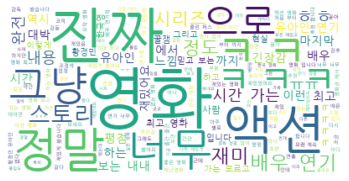

In [39]:
wordcloud = WordCloud(
    font_path='C:\\Users\\JaeIn\\AppData\\Local\\Microsoft\\Windows\\Fonts\\NanumGothicCoding.ttf',
    background_color='white',
    relative_scaling=0.5
).generate(' '.join(genre_df['액션'].dropna()))

plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

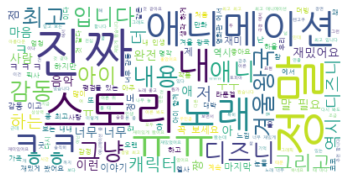

In [40]:
wordcloud = WordCloud(
    font_path='C:\\Users\\JaeIn\\AppData\\Local\\Microsoft\\Windows\\Fonts\\NanumGothicCoding.ttf',
    background_color='white',
    relative_scaling=0.5
).generate(' '.join(genre_df['애니메이션'].dropna()))

plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

In [57]:
drama

0          오랜
1          나를
2           울
3          ㅠㅠ
4           글
         ... 
593170    NaN
593171    NaN
593172    NaN
593173    NaN
593174    NaN
Name: 드라마, Length: 593175, dtype: object

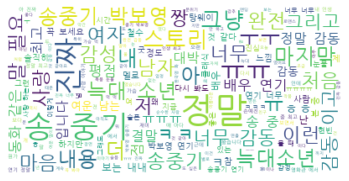

In [58]:
wordcloud = WordCloud(
    font_path='C:\\Users\\JaeIn\\AppData\\Local\\Microsoft\\Windows\\Fonts\\NanumGothicCoding.ttf',
    background_color='white',
    relative_scaling=0.5
).generate(' '.join(drama.dropna()))

plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

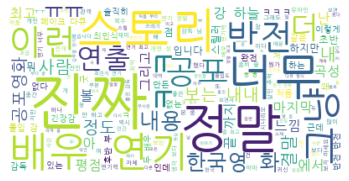

In [42]:
wordcloud = WordCloud(
    font_path='C:\\Users\\JaeIn\\AppData\\Local\\Microsoft\\Windows\\Fonts\\NanumGothicCoding.ttf',
    background_color='white',
    relative_scaling=0.5
).generate(' '.join(genre_df['호러'].dropna()))

plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

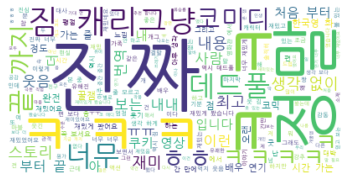

In [43]:
wordcloud = WordCloud(
    font_path='C:\\Users\\JaeIn\\AppData\\Local\\Microsoft\\Windows\\Fonts\\NanumGothicCoding.ttf',
    background_color='white',
    relative_scaling=0.5
).generate(' '.join(genre_df['코미디'].dropna()))

plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

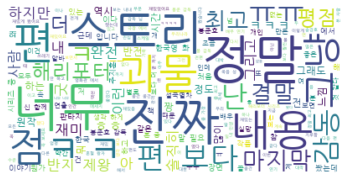

In [44]:
wordcloud = WordCloud(
    font_path='C:\\Users\\JaeIn\\AppData\\Local\\Microsoft\\Windows\\Fonts\\NanumGothicCoding.ttf',
    background_color='white',
    relative_scaling=0.5
).generate(' '.join(genre_df['판타지'].dropna()))

plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

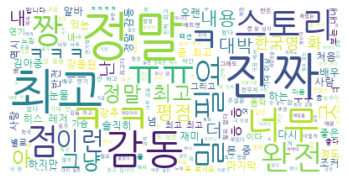

In [45]:
wordcloud = WordCloud(
    font_path='C:\\Users\\JaeIn\\AppData\\Local\\Microsoft\\Windows\\Fonts\\NanumGothicCoding.ttf',
    background_color='white',
    relative_scaling=0.5
).generate(' '.join(period_df['기간1'].dropna()))

plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

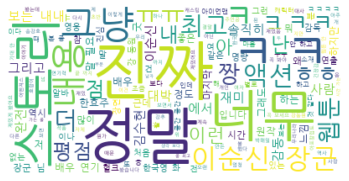

In [46]:
wordcloud = WordCloud(
    font_path='C:\\Users\\JaeIn\\AppData\\Local\\Microsoft\\Windows\\Fonts\\NanumGothicCoding.ttf',
    background_color='white',
    relative_scaling=0.5
).generate(' '.join(period_df['기간2'].dropna()))

plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

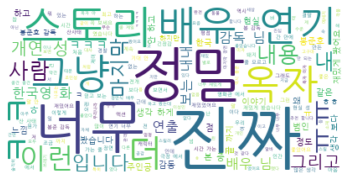

In [47]:
wordcloud = WordCloud(
    font_path='C:\\Users\\JaeIn\\AppData\\Local\\Microsoft\\Windows\\Fonts\\NanumGothicCoding.ttf',
    background_color='white',
    relative_scaling=0.5
).generate(' '.join(period_df['기간3'].dropna()))

plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()